In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

with open("Api_endpoint.json") as f:
    api_data = json.load(f)

with open("Quiz_submission_data.json") as f:
    submission_data = json.load(f)

with open("quiz_endpoint.json") as f:
    quiz_data = json.load(f)


quiz_data = quiz_data['quiz']


api_df = pd.json_normalize(api_data)  
submission_df = pd.json_normalize(submission_data)  
quiz_df = pd.DataFrame([quiz_data])  


quiz_df.rename(columns={'id': 'quiz_id'}, inplace=True)


In [3]:

current_user_metrics = {
    'quiz_id': submission_df['quiz_id'].iloc[0],
    'score': submission_df['score'].iloc[0],
    'accuracy': float(submission_df['accuracy'].iloc[0].strip('%')),
    'speed': submission_df['speed'].iloc[0],
    'max_mistake_count': quiz_df['max_mistake_count'].iloc[0],
    'questions_count': quiz_df['questions_count'].iloc[0],
    'topic': quiz_df['topic'].iloc[0],
}


print("Current User Metrics:")
for key, value in current_user_metrics.items():
    print(f"{key}: {value}")


Current User Metrics:
quiz_id: 43
score: 32
accuracy: 80.0
speed: 100
max_mistake_count: 15
questions_count: 128
topic: Structural Organisation in Animals


In [4]:

historical_data = api_df[api_df['user_id'] != submission_df['user_id'].iloc[0]]

if historical_data.empty:
    print("\nNo historical data available for this user.")
else:
    
    print("\nHistorical Data Summary:")
    print(historical_data[['quiz_id', 'score', 'accuracy', 'speed']])

    historical_data['score'] = historical_data['score'].astype(str).str.replace('%', '').astype(float)
    historical_data['accuracy'] = historical_data['accuracy'].astype(str).str.replace('%', '').astype(float)
    historical_data['speed'] = pd.to_numeric(historical_data['speed'], errors='coerce')

    
    historical_summary = historical_data[['score', 'accuracy', 'speed']].mean()
    print("\nHistorical Averages:")
    print(historical_summary)



Historical Data Summary:
    quiz_id  score accuracy speed
0        51    108     90 %   100
1         6     92    100 %   100
2        51    116     96 %   100
3         6     36     90 %   100
4        51     36     31 %    96
5        57     40     38 %    86
6         6     36     50 %    78
7        20     12     30 %   100
8        24     76    100 %    95
9        18     40    100 %   100
10       25    112     93 %   100
11       18     64     84 %    86
12       58     52     43 %   100
13       50     24     66 %    90

Historical Averages:
score       60.285714
accuracy    72.214286
speed       95.071429
dtype: float64


In [5]:

insights = []


max_possible_score = 4 * current_user_metrics['questions_count']  
score_percentage = (current_user_metrics['score'] / max_possible_score) * 100
insights.append(f"Score: {current_user_metrics['score']} ({score_percentage:.2f}% of maximum possible {max_possible_score}).")


if current_user_metrics['accuracy'] < 90.0:
    insights.append("Accuracy is below 90%. Focus on reviewing mistakes to improve.")


if int(current_user_metrics['speed']) < 80:  
    insights.append("Speed is below average. Consider practicing timed quizzes to improve pace.")


mistakes_made = current_user_metrics['questions_count'] - (current_user_metrics['accuracy'] / 100 * current_user_metrics['questions_count'])
if mistakes_made > current_user_metrics['max_mistake_count']:
    insights.append(f"Mistakes made ({mistakes_made:.0f}) exceeded the allowed limit ({current_user_metrics['max_mistake_count']}). Focus on avoiding repeated errors.")


print("\nInsights from the Current Quiz:")
for insight in insights:
    print(f"- {insight}")



Insights from the Current Quiz:
- Score: 32 (6.25% of maximum possible 512).
- Accuracy is below 90%. Focus on reviewing mistakes to improve.
- Mistakes made (26) exceeded the allowed limit (15). Focus on avoiding repeated errors.


In [6]:

recommendations = []


recommendations.append("Review incorrect answers from this quiz to avoid repeated mistakes.")


if int(current_user_metrics['speed']) < 100:
    recommendations.append("Practice with timed quizzes to improve response speed.")


if not(historical_data.empty):
    recommendations.append(f"Focus more on the topic: {current_user_metrics['topic']} for future improvement.")


print("\nRecommendations for Improvement:")
for rec in recommendations:
    print(f"- {rec}")



Recommendations for Improvement:
- Review incorrect answers from this quiz to avoid repeated mistakes.
- Focus more on the topic: Structural Organisation in Animals for future improvement.


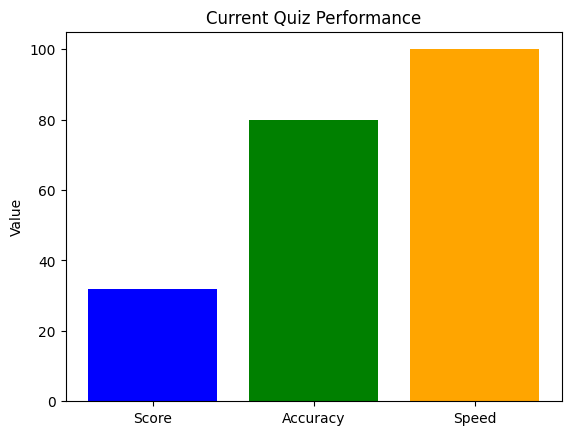

In [7]:

labels = ['Score', 'Accuracy', 'Speed']
values = [current_user_metrics['score'], current_user_metrics['accuracy'], int(current_user_metrics['speed'])]

plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title("Current Quiz Performance")
plt.ylabel("Value")
plt.show()
